<a href="https://colab.research.google.com/github/battistabiggio/ai4dev/blob/main/notebooks/NMC-and-sklearn-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate and visualize data

The function ```plot_dataset(X,Y)``` scatters the data generated in the previous exercise on a bi-dimensional feature space.

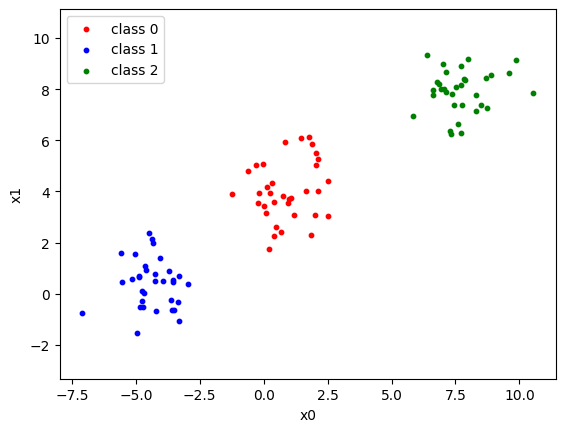

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


def plot_dataset(X,Y):
    colrs = ['r', 'b', 'g', 'k', 'c', 'm', 'y']
    n_classes = np.unique(Y).size
    for k in range(n_classes):
        xk = X[Y==k, :]
        plt.scatter(xk[:, 0], xk[:, 1], s=10, c=colrs[k], label='class '+str(k))
    plt.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')


X, Y = make_blobs(n_samples=100, n_features=2, random_state=3)
plot_dataset(X,Y)
plt.axis('equal')
plt.show()

## Nearest Mean Centroid classifier

Implement a nearest-mean-centroid classifier, which assigns data samples `x` to the class with the closest centroid.

- Implement the method `fit(x,y)` that estimates the centroids (one per class) from the training data.
- Implement the method `predict(x)` that computes the predicted labels for each sample in `x`.

See also https://en.wikipedia.org/wiki/Nearest_centroid_classifier

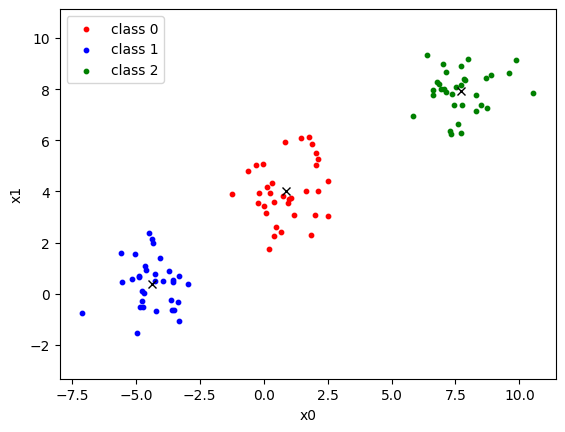

Accuracy on training data:  1.0


In [48]:
from sklearn.metrics import pairwise_distances


def fit(X, Y):
    """Estimate the training data centroids."""
    n_classes = np.unique(Y).size
    n_features = X.shape[1]
    centroids = np.zeros(shape=(n_classes, n_features))
    for k in range(n_classes):
        centroids[k, :] = np.mean(X[Y==k, :], axis=0)
    return centroids


def predict(X, centroids):
    """Predict labels for samples in X.
    Each sample is assigned to the class of the closest centroid."""
    # compute distance matrix of X vs centroids
    d = pairwise_distances(X, centroids)
    y_pred = np.argmin(d ,axis=1)  # take index of minimum per row
    return y_pred


# fit the classifier (i.e., estimate the training data centroids)
centroids = fit(X, Y)

# plot dataset and centroids
plot_dataset(X,Y)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx')
plt.axis('equal')
plt.show()

# compute predictions on X using the estimated centroids
y_pred = predict(X, centroids)

# accuracy: the fraction of samples that are correctly predicted
acc = (Y == y_pred).mean()
print('Accuracy on training data: ', acc)

Now, let's create a consistent object that contains both functions with a Python class.

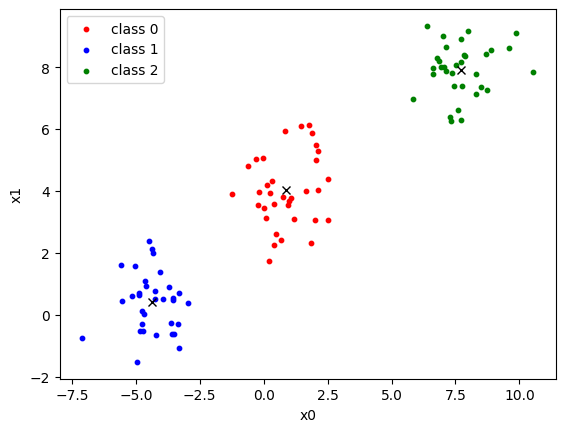

Accuracy on training data:  1.0


In [49]:
class CNearestMeanClassifier:
    """Class implementing a nearest mean classifier"""

    def __init__(self):
        self._centroids = None
        return

    @property
    def centroids(self):
        return self._centroids

    def fit(self, X, Y):
        n_classes = np.unique(Y).size
        n_features = X.shape[1]
        self._centroids = np.zeros(shape=(n_classes, n_features))
        for k in range(n_classes):
            self._centroids[k, :] = np.mean(X[Y==k, :], axis=0)
        return self

    def predict(self, X):
        d = pairwise_distances(X, self._centroids)
        y_pred = np.argmin(d ,axis=1)
        return y_pred


plot_dataset(X,Y)

clf = CNearestMeanClassifier()
clf.fit(X, Y)

plt.plot(clf.centroids[:, 0], clf.centroids[:, 1], 'kx')
plt.show()

y_pred = clf.predict(X)

acc = (Y == y_pred).mean()
print('Accuracy on training data: ', acc)


## Visualizing decision functions

Visualize the decision regions of the NearestMeanClassifier, as well as of other sklearn classifiers.

See, e.g., https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

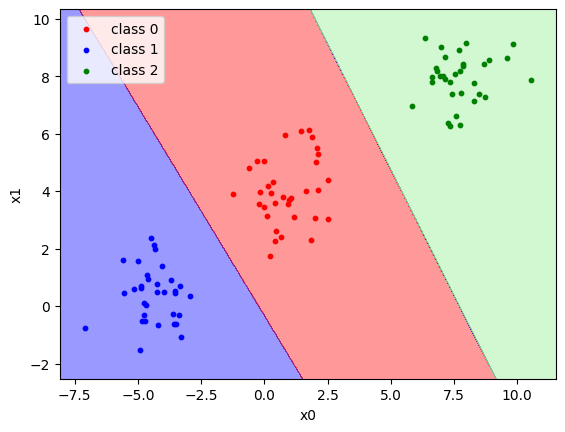

In [50]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, resolution=0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'black', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plot_dataset(x,y)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    return

plot_decision_regions(X, Y, clf)
plt.show()


Let's do it for some sklearn classifiers too.

Classification accuracy:  0.792


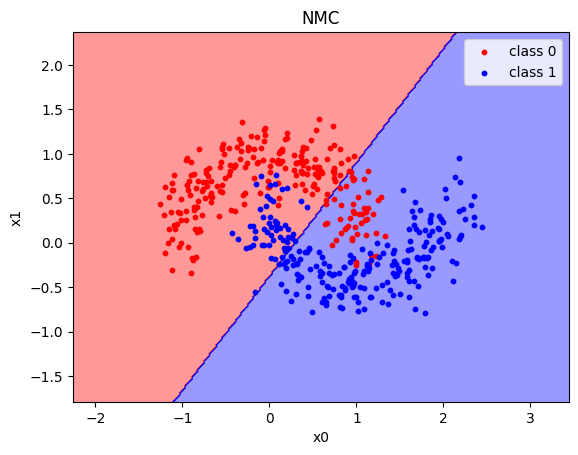

Classification accuracy:  0.871


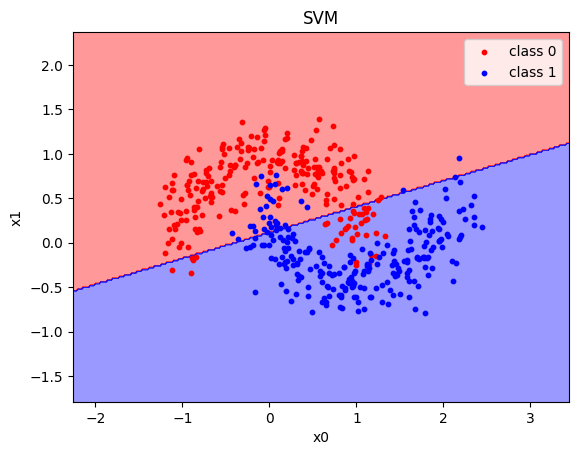

Classification accuracy:  0.943


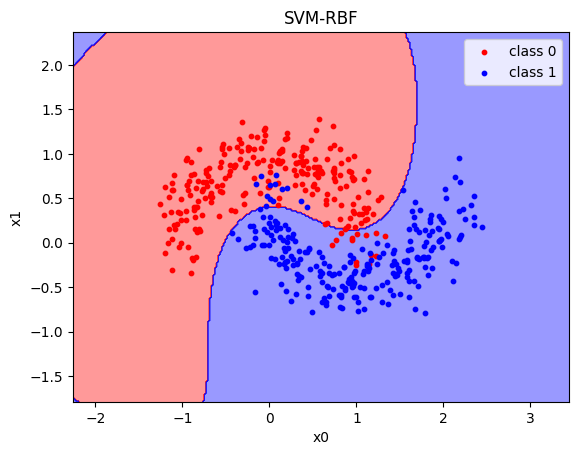

Classification accuracy:  0.963


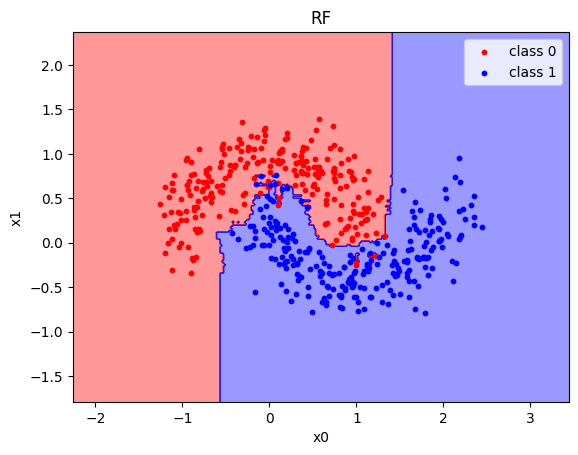

Classification accuracy:  0.968


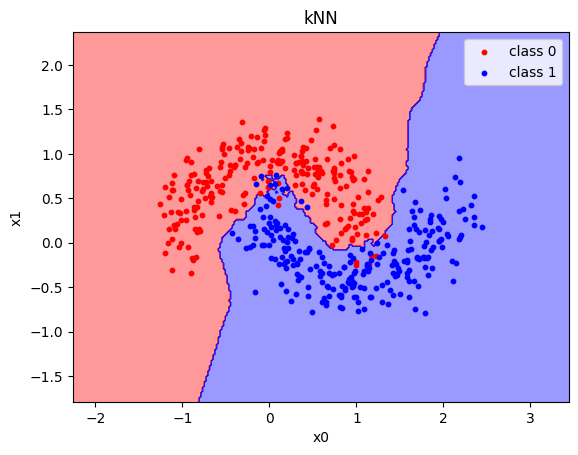

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.datasets import make_moons


x_tr, y_tr = make_moons(n_samples=500, noise=0.2, random_state=2)
x_ts, y_ts = make_moons(n_samples=1000, noise=0.2, random_state=2)

clf_list = [CNearestMeanClassifier(),
            SVC(kernel='linear'),
            SVC(kernel='rbf', gamma=1, C=0.1),
            RandomForestClassifier(),
            KNeighborsClassifier()]

clf_names = ['NMC', 'SVM', 'SVM-RBF', 'RF', 'kNN']

for i, clf in enumerate(clf_list):
    clf.fit(x_tr, y_tr)
    plot_decision_regions(x_tr, y_tr, clf)
    y_pred = clf.predict(x_ts)
    print('Classification accuracy: ', np.mean(y_pred == y_ts))
    plt.title(clf_names[i])
    plt.show()
